 <ipython-input-40-db31dbcdb164>:16: WavFileWarning:Chunk (non-data) not understood, skipping it.


GP_regression.,value,constraints,priors
sum.std_periodic.variance,1.0,+ve,
sum.std_periodic.period,0.005,+ve,
sum.std_periodic.lengthscale,1.0,+ve,
sum.std_periodic_1.variance,1.0,+ve,
sum.std_periodic_1.period,0.0125,+ve,
sum.std_periodic_1.lengthscale,1.0,+ve,
sum.std_periodic_2.variance,1.0,+ve,
sum.std_periodic_2.period,0.0025,+ve,
sum.std_periodic_2.lengthscale,1.0,+ve,
Gaussian_noise.variance,0.0,+ve fixed,


-5414740.06204923

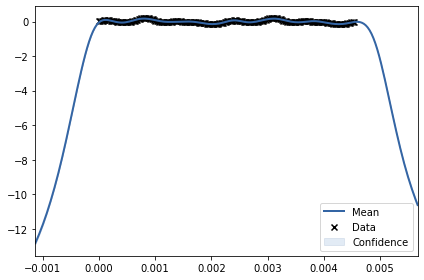

In [40]:

import numpy as np
import GPy
import matplotlib as plt
from gaussian_processes_util import plot_gp
import scipy.io.wavfile as wav
import MoG_kernel
import Custom_kernel # non editted, for testing purposes

#TODO make my own GPy kernel following the rules laid out in the docs


noise = 0.000


wav_file = '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/tuner_440.wav'
sample_rate, data = wav.read(wav_file)

# Truncate data to make manageable
Y_train = data[:200].reshape(-1, 1)  

# Find time time length of truncated data
time_length = Y_train.shape[0] / sample_rate

# Plot times
X_train = np.linspace(0., time_length, Y_train.shape[0]).reshape(-1, 1)


# kernel = MoG_kernel.CustomMogKernel(input_dim=1, variance=1.0, partial_count=5, frequencies=440)
kernel =GPy.kern.StdPeriodic(input_dim=1, variance=1.0, period = [1/200], ARD1 =True, ARD2=True) + GPy.kern.StdPeriodic(input_dim=1, variance=1.0, period = [1/80], ARD1 =True, ARD2=True) + GPy.kern.StdPeriodic(input_dim=1, variance=1.0, period = [1/400], ARD1 =True, ARD2=True)
# rbf = MoG_spectral_kernel_matrix()2
gpr = GPy.models.GPRegression(X_train, Y_train, kernel)

# Fix the noise variance to known value 
gpr.Gaussian_noise.variance = noise**2
gpr.Gaussian_noise.variance.fix()


# Display optimized parameter values
display(gpr)


gpr.plot()
gpr.log_likelihood()


 /Users/josephine/opt/anaconda3/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:divide by zero encountered in log


GP_regression.,value,constraints,priors
sum.std_periodic.variance,1.0302949933775752e-05,+ve,
sum.std_periodic.period,0.0036291331011470756,+ve,
sum.std_periodic.lengthscale,0.041927223108129394,+ve,
sum.std_periodic_1.variance,0.008085674840570855,+ve,
sum.std_periodic_1.period,0.0760854564442638,+ve,
sum.std_periodic_1.lengthscale,0.007113447378150752,+ve,
sum.std_periodic_2.variance,3.5241193865452504e-06,+ve,
sum.std_periodic_2.period,0.0008911304902085858,+ve,
sum.std_periodic_2.lengthscale,0.20601268545531756,+ve,
Gaussian_noise.variance,0.0,+ve fixed,


1123.0483928227832

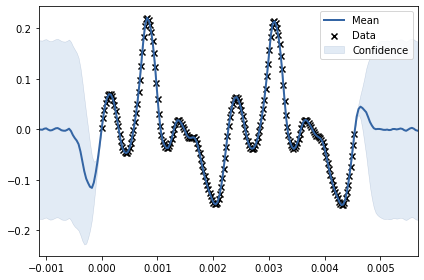

In [41]:

# Run optimization
gpr.optimize()

# Display optimized parameter values
display(gpr)

gpr.plot()

gpr.log_likelihood()